In [1]:
import gym
import robo_gym
from robo_gym.wrappers.exception_handling import ExceptionHandling

import numpy as np

In [2]:
target_machine_ip = 'localhost' # or other machine 'xxx.xxx.xxx.xxx'

# initialize environment
env = gym.make('CubeRoomSearchLikeContinuously-v0', ip=target_machine_ip, gui=True, max_episode_steps=30)
env = ExceptionHandling(env)

state = env.reset()

Starting new Robot Server | Tentative 1
<class 'server_manager_pb2.RobotServer'>
True 
Successfully started Robot Server at localhost:45783


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [5]:
total_reward = 0
done = False
for _ in range(10):
    # random step in the environment
    state, reward, done, info = env.step(env.action_space.sample())
    print(reward)
    total_reward += reward
    
print(total_reward, info)

-0.05
-0.05
0.0
-0.05
0.0
-0.05
-0.05
-0.05
0.0
-0.05
-0.35 {}


In [7]:
for _ in range(10):
    env.reset(new_agent_pose=True)

In [9]:
state = env.reset(new_agent_pose=True)

In [19]:
state, reward, done, info = env.step(env.action_space.sample())
print(reward)

0.0


{-1: 16011, 0: 288, 100: 85}
{0: 85, 128: 16011, 255: 288}


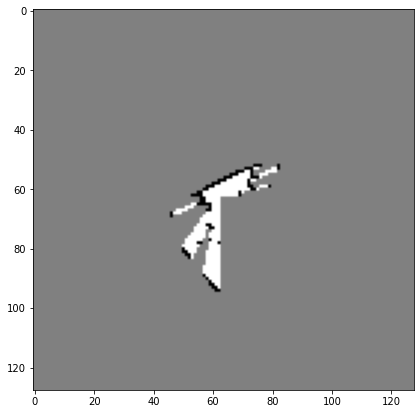

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 7,7

o = np.array(state['occupancy_grid'], dtype=np.int16)
unique, counts = np.unique(o, return_counts=True)
print(dict(zip(unique, counts)))

o[o == 0] = 255
o[o == 100] = 0
o[o == -1] = 128
unique, counts = np.unique(o, return_counts=True)
print(dict(zip(unique, counts)))
img = o.reshape((128,128)).T
plt.imshow(img, cmap='gray') 